# 1. Load Data

In [6]:
# import library all we need
import os #to enable your path can be process if your data not in system
import pandas as pd
from pycaret.regression import *  #we import all package of regression with '*'

os.chdir('D:/dataset') # we process data from "D:/datasets" 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('shape data train',train.shape)
print('shape data test',test.shape)

train.head()

shape data train (1460, 81)
shape data test (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Auto Preprocessing

In [8]:
# our target is SalePrice
exp_clf = setup(train, target='SalePrice')

,Description,Value
0,session_id,7772
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 408)"


# 3. Comparison Model

In [12]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15819.4723,839997971.5309,27262.1837,0.8764,0.1298,0.0910,15.6290
gbr,Gradient Boosting Regressor,17269.5550,873320521.0327,28445.5463,0.8642,0.1393,0.1002,0.9190
lightgbm,Light Gradient Boosting Machine,17782.3759,940491610.4298,29560.0118,0.8565,0.1463,0.1023,0.4000
rf,Random Forest Regressor,19198.1340,1100371111.6864,31897.3237,0.8320,0.1587,0.1139,2.3920
xgboost,Extreme Gradient Boosting,19467.4406,1191499273.6000,32937.4773,0.8203,0.1554,0.1105,1.7890
et,Extra Trees Regressor,22264.0853,1361400513.7694,36116.2413,0.7815,0.1769,0.1272,2.9260
ridge,Ridge Regression,20651.2984,1418476595.2000,35395.1789,0.7790,0.1763,0.1224,0.1110
ada,AdaBoost Regressor,25602.7459,1496740725.5596,37727.3971,0.7651,0.2075,0.1667,0.8180
en,Elastic Net,21156.7676,1631079801.6000,37316.8789,0.7496,0.1656,0.1223,0.3750
br,Bayesian Ridge,25263.7558,2050698734.5159,42583.7316,0.6787,0.1978,0.1461,0.4390


# 4. Creating and Predict Model

In [13]:
# here i use 10 fold in cross validation LightGBM Classifier
catboost = create_model('catboost', cross_validation = True)
pred_cb = predict_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16215.1955,655042463.8557,25593.7974,0.8865,0.1091,0.0825
1,13275.8133,326813948.5085,18077.9963,0.9278,0.1528,0.1039
2,14617.2037,389008123.4134,19723.2889,0.9116,0.1257,0.0880
3,12587.2847,278711161.1072,16694.6447,0.9239,0.1001,0.0776
4,14826.0575,424321031.2430,20599.0541,0.9270,0.1074,0.0820
5,16245.3195,698565679.6138,26430.3931,0.8806,0.1528,0.1049
6,20549.2074,2532623562.7529,50325.1782,0.7779,0.1409,0.0897
7,16006.4061,1457748981.5553,38180.4791,0.7442,0.1473,0.0947
8,14951.0692,674292981.8213,25967.1520,0.8976,0.1434,0.0950
9,18921.1657,962851781.4382,31029.8531,0.8868,0.1188,0.0916


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14266.4011,549746567.3340,23446.6750,0.9139,0.1245,0.0864


# 5. Ploting Model

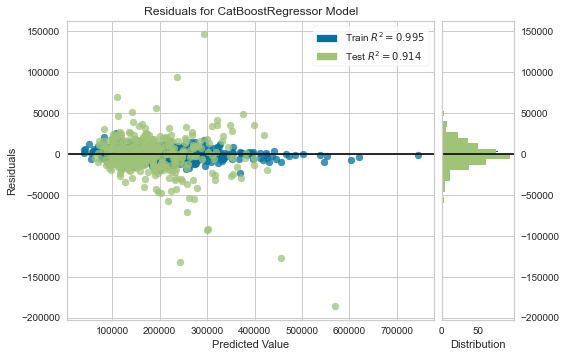

In [16]:
plot_model(catboost)

# 6. Interpret features Importance of Model

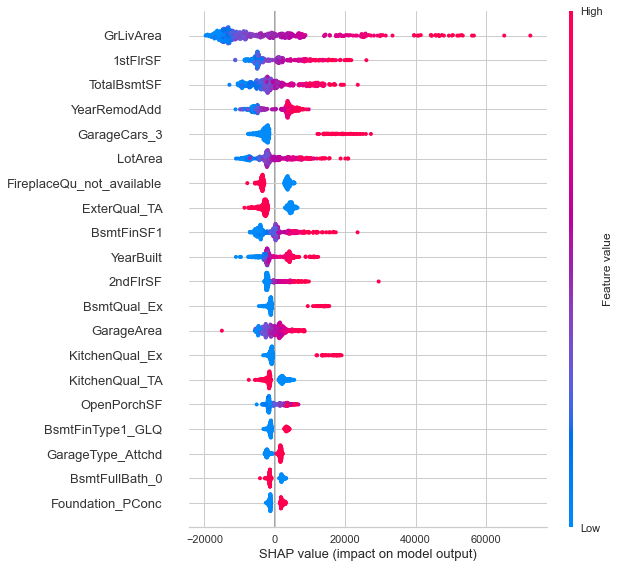

In [17]:
interpret_model(catboost)

# 7. Making Submission 

In [21]:
fcb = finalize_model(catboost)

In [22]:
test_predictions = predict_model(fcb, data=test)
submission = test_predictions[['Id', 'Label']]
submission.columns = ['Id', 'SalePrice']
submission.to_csv('submission.csv', index=False)

# 8. Save model

In [23]:
save_model(fcb, 'house_price')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='SalePrice')),
                 ('fix_perfect', Remove_100(target='SalePrice')),
                 ('clean_na